In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import seaborn as sns

In [ ]:
train = pd.read_excel("training_data.xlsx")

In [ ]:
val = pd.read_excel("validation_data.xlsx")

In [ ]:
test = pd.read_excel("test_data.xlsx")

In [ ]:
X_train = train.drop(["label", "sample", "cancer_type"], axis=1)

y_train = train["label"]

In [ ]:
X_val = val.drop(["label", "sample", "cancer_type"], axis=1)

y_val = val["label"]

In [ ]:
X_test = test.drop(["label", "sample", "cancer_type"], axis=1)

y_test = test["label"]

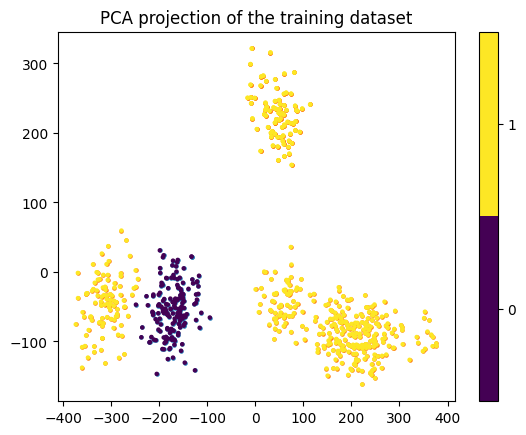

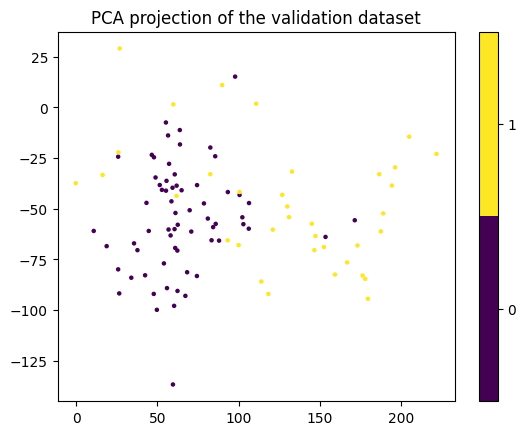

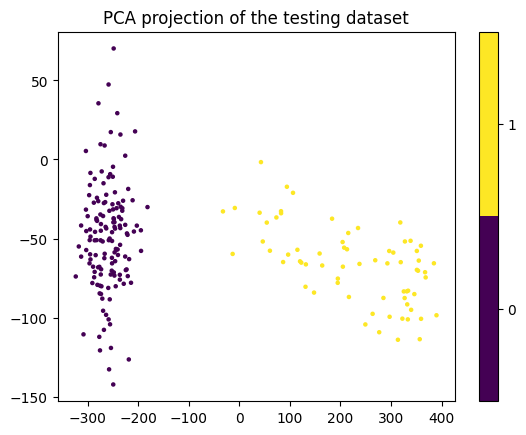

In [ ]:
# Scale the original data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Fit PCA on the training data and transform both the training and testing data
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Create a scatter plot of the PCA-transformed data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=5)
plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks(np.arange(2))
plt.title('PCA projection of the training dataset')

plt.scatter(X_val_pca[:, 0], X_val_pca[:, 1], c=y_val, s=5)
plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks(np.arange(2))
plt.title('PCA projection of the validation dataset')
plt.show()

plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, s=5)
plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks(np.arange(2))
plt.title('PCA projection of the testing dataset')
plt.show()

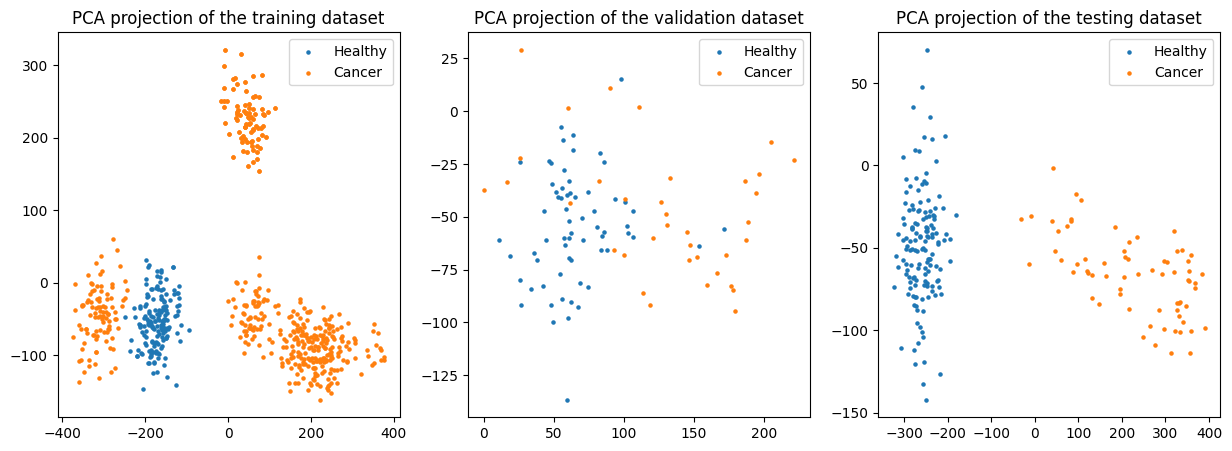

In [ ]:
# Create a figure and a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot PCA projections for training, validation, and testing datasets
datasets = [
    (X_train_pca, y_train, 'training'),
    (X_val_pca, y_val, 'validation'),
    (X_test_pca, y_test, 'testing'),
]

for idx, (X, y, title) in enumerate(datasets):
    healthy_mask = y == 0
    cancer_mask = y == 1

    axes[idx].scatter(X[healthy_mask, 0], X[healthy_mask, 1], s=5, label='Healthy')
    axes[idx].scatter(X[cancer_mask, 0], X[cancer_mask, 1], s=5, label='Cancer')
    axes[idx].set_title(f'PCA projection of the {title} dataset')
    axes[idx].legend()

# Save the figure as a high-resolution PNG
plt.savefig('PCA_scatter_plots.png', dpi=300)

# Show the plot
plt.show()

In [ ]:
# Best hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Create a random forest model
rf = RandomForestClassifier(random_state=42)

# Create the grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', verbose=1)

# Fit the grid search object to the PCA-transformed training data
grid_search.fit(X_train_pca, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Predict the labels for the PCA-transformed testing data using the best model
y_pred = grid_search.predict(X_test_pca)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print(classification_report(y_val, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_val, y_pred))

# Print the F1 scores for each hyperparameter combination
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(f"{mean_score:.3f} - {params}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.3564356435643564
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.36      1.00      0.53        36

    accuracy                           0.36       101
   macro avg       0.18      0.50      0.26       101
weighted avg       0.13      0.36      0.19       101

[[ 0 65]
 [ 0 36]]
0.907 - {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}
0.932 - {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
0.941 - {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
0.954 - {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
0.915 - {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 10}
0.938 - {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
0.943 - {'max_depth': None, 'min_samples_

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5118483412322274
F1 score: 0.5690376569037656
AUC-ROC score: 1.0
              precision    recall  f1-score   support

           0       1.00      0.28      0.44       143
           1       0.40      1.00      0.57        68

    accuracy                           0.51       211
   macro avg       0.70      0.64      0.50       211
weighted avg       0.81      0.51      0.48       211



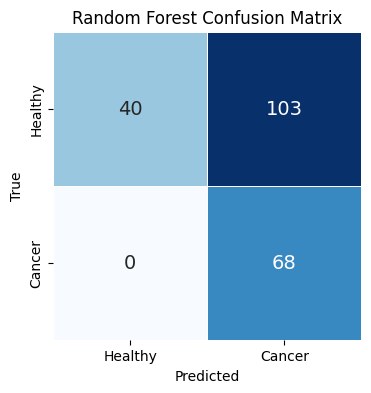

In [ ]:
rf = RandomForestClassifier(random_state=42, max_depth = None, min_samples_split=10, n_estimators=200)

# Fit the model on the training data
rf.fit(X_train_pca, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test_pca)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

# Calculate and print the AUC-ROC score
y_pred_proba = rf.predict_proba(X_test_pca)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC score:", auc_roc)

# Print the classification report
print(classification_report(y_test, y_pred))

# Define the class labels
class_labels = ['Healthy', 'Cancer']

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, linewidths=0.5, cbar=False,
            xticklabels=class_labels, yticklabels=class_labels,
            annot_kws={'size': 14})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [ ]:
# Define the MLPClassifier and hyperparameters to tune
mlp = MLPClassifier(random_state=42)
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Create a GridSearchCV instance to perform hyperparameter tuning
grid_search = GridSearchCV(mlp, parameters, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best hyperparameters: {best_params}")
print(f"Best score: {best_score}")

# Train the best MLP model with the entire training set
best_mlp = MLPClassifier(**best_params, random_state=42)
best_mlp.fit(X_train_pca, y_train)

# Evaluate the best MLP model on the test set
y_pred = best_mlp.predict(X_val_pca)
test_accuracy = accuracy_score(y_val, y_pred)

print(f"Test accuracy: {test_accuracy}")

# Best hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'sgd'}
# Best score: 0.9041472416472416
# Test accuracy: 0.36633663366336633

Fitting 5 folds for each of 72 candidates, totalling 360 fits


KeyboardInterrupt: ignored

0.995260663507109 0.9925925925925926


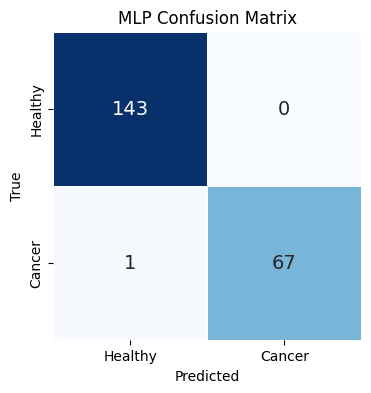

In [ ]:
best_mlp = MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(50,),
                         learning_rate='constant', solver='sgd', random_state=42)
best_mlp.fit(X_train_pca, y_train)

y_pred = best_mlp.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_pred)
F1_score = f1_score(y_test, y_pred)

print(test_accuracy, F1_score)

#0.995260663507109 0.9925925925925926

 # Define the class labels
class_labels = ['Healthy', 'Cancer']

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, linewidths=0.5, cbar=False,
            xticklabels=class_labels, yticklabels=class_labels,
            annot_kws={'size': 14})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('MLP Confusion Matrix')
plt.show()

In [ ]:
# Define the XGBClassifier and hyperparameters to tune
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.8, 1],
    'colsample_bytree': [0.5, 0.8, 1],
}

# Create a GridSearchCV instance to perform hyperparameter tuning
grid_search = GridSearchCV(xgb_clf, parameters, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best hyperparameters: {best_params}")
print(f"Best score: {best_score}")

# Train the best XGBoost model with the entire training set
best_xgb = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
best_xgb.fit(X_train_pca, y_train)

# Evaluate the best XGBoost model on the test set
y_pred = best_xgb.predict(X_val_pca)
test_accuracy = accuracy_score(y_val, y_pred)

print(f"Test accuracy: {test_accuracy}")

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best hyperparameters: {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.5}
Best score: 0.9972222222222221
Test accuracy: 0.3564356435643564


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[15:39:40] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_byteee" } are not used.

Test accuracy: 0.8578199052132701
F1 Score: 0.819277108433735


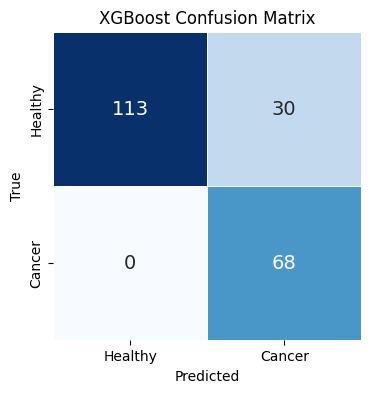

In [ ]:
best_xgb = xgb.XGBClassifier(colsample_byteee=0.5, learning_rate=0.2, max_depth=3,
                             min_child_weight=1, n_estimators=50, subsample=0.5,
                             use_label_encoder=False, eval_metric='mlogloss')
best_xgb.fit(X_train_pca, y_train)

# Evaluate the best XGBoost model on the test set
y_pred = best_xgb.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_pred)
F1_score = f1_score(y_test, y_pred)

print(f"Test accuracy: {test_accuracy}")
print(f'F1 Score: {F1_score}')

# Test accuracy: 0.8578199052132701
# F1 Score: 0.819277108433735

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, linewidths=0.5, cbar=False,
            xticklabels=class_labels, yticklabels=class_labels,
            annot_kws={'size': 14})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost Confusion Matrix')
plt.show()

In [ ]:
# Define the LogisticRegression model and hyperparameters to tune
log_reg = LogisticRegression(solver='liblinear')
parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

# Create a GridSearchCV instance to perform hyperparameter tuning
grid_search = GridSearchCV(log_reg, parameters, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best hyperparameters: {best_params}")
print(f"Best score: {best_score}")

# Train the best Logistic Regression model with the entire training set
best_log_reg = LogisticRegression(**best_params, solver='liblinear')
best_log_reg.fit(X_train_pca, y_train)

# Evaluate the best Logistic Regression model on the test set
y_pred = best_log_reg.predict(X_val_pca)
test_accuracy = accuracy_score(y_val, y_pred)

print(f"Test accuracy: {test_accuracy}")
print(confusion_matrix(y_val, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters: {'C': 0.01, 'penalty': 'l1'}
Best score: 0.7930555555555556
Test accuracy: 0.6138613861386139
[[36 29]
 [10 26]]


Test accuracy: 0.933649289099526
f1 score: 0.8852459016393442


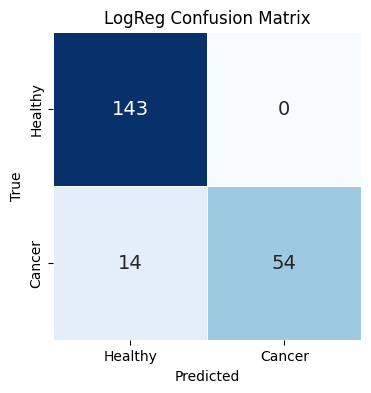

In [ ]:
best_log_reg = LogisticRegression(**best_params, solver='liblinear')
best_log_reg.fit(X_train_pca, y_train)

y_pred = best_log_reg.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_pred)
F1_score = f1_score(y_test, y_pred)

print(f"Test accuracy: {test_accuracy}")
print(f"f1 score: {F1_score}")

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, linewidths=0.5, cbar=False,
            xticklabels=class_labels, yticklabels=class_labels,
            annot_kws={'size': 14})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LogReg Confusion Matrix')
plt.show()